In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation, Dropout
import matplotlib.pyplot as plt

In [ ]:
train_dir = '/content/drive/MyDrive/ProyekAkhirOrbit/Dataset2080/training'
val_dir = '/content/drive/MyDrive/ProyekAkhirOrbit/Dataset2080/validation'

In [ ]:
img_height = 200
img_width = 200

In [ ]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        vertical_flip=True,
        horizontal_flip=True,
        shear_range = 0.2,
        rotation_range= 20
        )

test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
                  train_dir,
                  target_size=(200, 200),
                  class_mode="categorical"
                  )

val_generator = test_datagen.flow_from_directory(
                val_dir,
                target_size=(200, 200),
                class_mode="categorical",
                )

Found 960 images belonging to 6 classes.
Found 240 images belonging to 6 classes.


In [ ]:
class_names = train_generator.class_indices
print(class_names)

{'Jawa': 0, 'Kalimantan': 1, 'Maluku dan Papua': 2, 'Sulawesi': 3, 'Sumatra': 4, 'Sunda kecil': 5}


In [ ]:
from tensorflow.keras import backend

In [ ]:
backend.clear_session()

model = Sequential()

model.add(Conv2D(64, 3, input_shape=(200, 200,3), activation='relu'))
model.add(MaxPool2D(2, 2))
model.add(Conv2D(64, 3, activation='relu'))
model.add(MaxPool2D(2, 2))
model.add(Conv2D(128, 3, activation='relu'))
model.add(MaxPool2D(2, 2))
model.add(Conv2D(128, 3, activation='relu'))
model.add(MaxPool2D(2, 2))
model.add(Conv2D(256, 3, activation='relu'))
model.add(MaxPool2D(2, 2))
model.add(Conv2D(256, 3, activation='relu'))
model.add(MaxPool2D(2, 2))

model.add(Flatten())

model.add(Dense(6, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 128)      0

In [ ]:
from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate=0.0001)

model.compile(
    optimizer=opt,
    loss=tf.losses.CategoricalCrossentropy(),
    metrics=['accuracy'])

In [ ]:
history = model.fit(
          train_generator,
          validation_data=val_generator,
          epochs=50,
          batch_size=32,
)

Epoch 1/50
30/30 [==============================] - 12s 378ms/step - loss: 1.7943 - accuracy: 0.1604 - val_loss: 1.7877 - val_accuracy: 0.1667
Epoch 2/50
30/30 [==============================] - 11s 368ms/step - loss: 1.7873 - accuracy: 0.1760 - val_loss: 1.7822 - val_accuracy: 0.1708
Epoch 3/50
30/30 [==============================] - 11s 371ms/step - loss: 1.7705 - accuracy: 0.2271 - val_loss: 1.7267 - val_accuracy: 0.2750
Epoch 4/50
30/30 [==============================] - 11s 371ms/step - loss: 1.7421 - accuracy: 0.2427 - val_loss: 1.7637 - val_accuracy: 0.2167
Epoch 5/50
30/30 [==============================] - 11s 368ms/step - loss: 1.7416 - accuracy: 0.2250 - val_loss: 1.6921 - val_accuracy: 0.3500
Epoch 6/50
30/30 [==============================] - 11s 373ms/step - loss: 1.6776 - accuracy: 0.3063 - val_loss: 1.5839 - val_accuracy: 0.3333
Epoch 7/50
30/30 [==============================] - 11s 372ms/step - loss: 1.6374 - accuracy: 0.3083 - val_loss: 1.5160 - val_accuracy: 0.4250

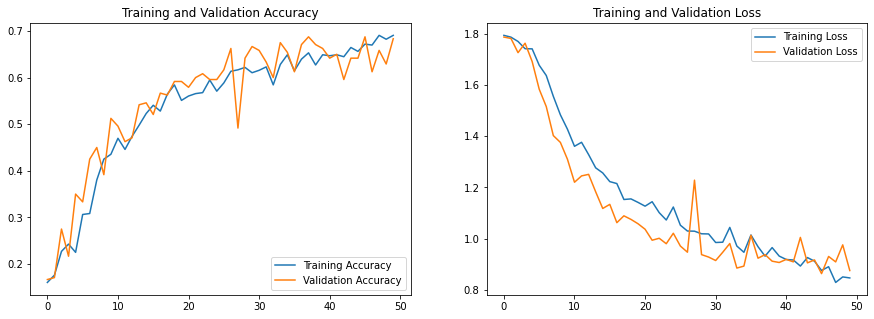

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(50)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
score = model.evaluate(train_generator)

print('Loss: {:.4f}'.format(score[0]))
print('Accuracy: {:.4f}'.format(score[1]))

30/30 [==============================] - 14s 485ms/step - loss: 0.7850 - accuracy: 0.7052
Loss: 0.7850
Accuracy: 0.7052


In [ ]:
score = model.evaluate(val_generator)

print('Loss: {:.4f}'.format(score[0]))
print('Accuracy: {:.4f}'.format(score[1]))

8/8 [==============================] - 1s 83ms/step - loss: 0.8749 - accuracy: 0.6833
Loss: 0.8749
Accuracy: 0.6833


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import sklearn.metrics

Y_pred = model.predict(val_generator, val_generator.n // 32 + 1)
y_pred = np.argmax(Y_pred, axis=1)

print('Confusion Matrix')
print(confusion_matrix(val_generator.classes, y_pred))
confusion_array = sklearn.metrics.confusion_matrix(val_generator.classes, y_pred)

print('True Positive = ', confusion_array[1,1])
print('False Positive = ', confusion_array[0,1])
print('True Negative = ', confusion_array[0,0])
print('False Negative = ', confusion_array[1,0])

Confusion Matrix
[[ 3  6  3  6 10 12]
 [11  7  3  8  5  6]
 [ 7  6  7  2  8 10]
 [11  1  7  5  5 11]
 [ 9  5  6  9  5  6]
 [ 8  3  2  9  7 11]]
True Positive =  7
False Positive =  6
True Negative =  3
False Negative =  11


In [ ]:
print('Classification Report')
target_names = ['Jawa', 'Kalimantan', 'Maluku dan Papua', 'Sulawesi', 'Sumatera', 'Sunda Kecil']
print(classification_report(val_generator.classes, y_pred, target_names=target_names))

Classification Report
                  precision    recall  f1-score   support

            Jawa       0.06      0.07      0.07        40
      Kalimantan       0.25      0.17      0.21        40
Maluku dan Papua       0.25      0.17      0.21        40
        Sulawesi       0.13      0.12      0.13        40
        Sumatera       0.12      0.12      0.12        40
     Sunda Kecil       0.20      0.28      0.23        40

        accuracy                           0.16       240
       macro avg       0.17      0.16      0.16       240
    weighted avg       0.17      0.16      0.16       240



In [ ]:
evaluation = pd.DataFrame({'Model': [],
                           'Data_Train': [],
                           'Data_Valid': [],
                           'Epochs': [],
                           'Batch_Size': [],
                           'Loss': [],
                           'Accuracy': []
})

r = evaluation.shape[0]
evaluation.loc[r] = ['CNN', train_generator.n, val_generator.n, 50, 32, score[0], score[1]]
evaluation

,Model,Data_Train,Data_Valid,Epochs,Batch_Size,Loss,Accuracy
0,CNN,960.0,240.0,50.0,32.0,0.874924,0.683333
